In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score

# IMPORTING DATASET

In [2]:
dataset = pd.read_csv('annual_temp.csv')
dataset

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687
...,...,...,...
267,GISTEMP,1882,-0.1000
268,GCAG,1881,-0.0707
269,GISTEMP,1881,-0.1200
270,GCAG,1880,-0.1247


In [3]:
dataset.set_index('Source',inplace=True)
dataset

,Year,Mean
Source,,
GCAG,2015,0.8990
GISTEMP,2015,0.8700
GCAG,2014,0.7402
GISTEMP,2014,0.7500
GCAG,2013,0.6687
...,...,...
GISTEMP,1882,-0.1000
GCAG,1881,-0.0707
GISTEMP,1881,-0.1200


In [4]:
GCAG_df=pd.DataFrame(dataset.loc['GCAG'])
GISTEMP_df=pd.DataFrame(dataset.loc['GISTEMP'])
display(GCAG_df,GISTEMP_df)

,Year,Mean
Source,,
GCAG,2015,0.8990
GCAG,2014,0.7402
GCAG,2013,0.6687
GCAG,2012,0.6219
GCAG,2011,0.5759
...,...,...
GCAG,1884,-0.2099
GCAG,1883,-0.1481
GCAG,1882,-0.0710


,Year,Mean
Source,,
GISTEMP,2015,0.87
GISTEMP,2014,0.75
GISTEMP,2013,0.66
GISTEMP,2012,0.64
GISTEMP,2011,0.61
...,...,...
GISTEMP,1884,-0.28
GISTEMP,1883,-0.20
GISTEMP,1882,-0.10


In [5]:
GCAG_df.reset_index(inplace=True)

In [6]:
GISTEMP_df.reset_index(inplace=True)

# GCAG_df

In [7]:
GCAG_df

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GCAG,2014,0.7402
2,GCAG,2013,0.6687
3,GCAG,2012,0.6219
4,GCAG,2011,0.5759
...,...,...,...
131,GCAG,1884,-0.2099
132,GCAG,1883,-0.1481
133,GCAG,1882,-0.0710
134,GCAG,1881,-0.0707


# APPLYING MODEL

In [8]:
x1= GCAG_df.iloc[:,-2:-1].values
y1 = GCAG_df.iloc[:,-1].values

## POLYNOMIAL REGRESSION  GCAG

In [9]:
from sklearn.model_selection import train_test_split
x1_train,x1_test, y1_train,y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [10]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom1 = PolynomialFeatures(degree = 2) 
x1_polynom = polynom1.fit_transform(x1_train) 
#polynom.fit(x1_polynom,y1_train)
x1_polynom

array([[1.000000e+00, 2.002000e+03, 4.008004e+06],
       [1.000000e+00, 1.888000e+03, 3.564544e+06],
       [1.000000e+00, 1.894000e+03, 3.587236e+06],
       [1.000000e+00, 1.953000e+03, 3.814209e+06],
       [1.000000e+00, 1.956000e+03, 3.825936e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.952000e+03, 3.810304e+06],
       [1.000000e+00, 1.975000e+03, 3.900625e+06],
       [1.000000e+00, 1.906000e+03, 3.632836e+06],
       [1.000000e+00, 1.955000e+03, 3.822025e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 1.909000e+03, 3.644281e+06],
       [1.000000e+00, 1.930000e+03, 3.724900e+06],
       [1.000000e+00, 2.009000e+03, 4.036081e+06],
       [1.000000e+00, 1.929000e+03, 3.721041e+06],
       [1.000000e+00, 1.949000e+03, 3.798601e+06],
       [1.000000e+00, 1.905000e+03, 3.629025e+06],
       [1.000000e+00, 1.926000e+03, 3.709476e+06],
       [1.000000e+00, 1.947000e+03, 3.790809e+06],
       [1.000000e+00, 1.891000e

In [11]:
#Fit the Polynomial Regression Model 
from sklearn.linear_model import LinearRegression
PolyReg_1 = LinearRegression() 
PolyReg_1.fit(x1_polynom, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
import matplotlib.pyplot as plt
# Visualise the Polynomial Regression Results 
plt.figure(figsize=(8,5))
plt.scatter(x1_train, y1_train ,color = 'b' ,label="DATA_POINTS") 
  
plt.plot(x1_train, PolyReg_1.predict(polynom1.fit_transform(x1_train)), color = 'r',label="REG_LINE") 
plt.title('ANNUAL TEMPERATURE Training set',fontsize=18)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('MEAN',fontsize=18)
plt.legend()  
plt.show()


<Figure size 800x500 with 1 Axes>

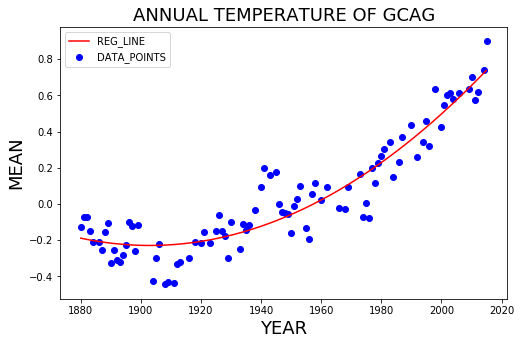

In [32]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.figure(figsize=(8,5))
X1_grid = np.arange(min(x1_train), max(x1_train), 0.1)
X1_grid = X1_grid.reshape((len(X1_grid), 1))
plt.scatter(x1_train, y1_train, color = 'b',label="DATA_POINTS")
plt.plot(X1_grid, PolyReg_1.predict(polynom1.fit_transform(X1_grid)), color = 'r',label="REG_LINE")
plt.title('ANNUAL TEMPERATURE OF GCAG',fontsize=18)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('MEAN',fontsize=18)

plt.legend()   
plt.show()

In [14]:
y1_pred=PolyReg_1.predict(polynom1.fit_transform(x1_test))

In [15]:
ind1_acc=r2_score(y1_test,y1_pred)
print(r2_score(y1_test,y1_pred))

0.8221433641462763


# GISTEMP_df

In [16]:
GISTEMP_df

,Source,Year,Mean
0,GISTEMP,2015,0.87
1,GISTEMP,2014,0.75
2,GISTEMP,2013,0.66
3,GISTEMP,2012,0.64
4,GISTEMP,2011,0.61
...,...,...,...
131,GISTEMP,1884,-0.28
132,GISTEMP,1883,-0.20
133,GISTEMP,1882,-0.10
134,GISTEMP,1881,-0.12


In [17]:
x2= GISTEMP_df.iloc[:,-2:-1].values
y2 = GISTEMP_df.iloc[:,-1].values

# POLYNOMIAL REGRESSION GISTEMP

In [18]:
from sklearn.model_selection import train_test_split
x2_train,x2_test, y2_train,y2_test = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [19]:
# Add the polynomial term to the equation/model
from sklearn.preprocessing import PolynomialFeatures 
  
polynom2 = PolynomialFeatures(degree = 2) 
x2_polynom = polynom2.fit_transform(x2_train) 
#polynom.fit(x1_polynom,y1_Train)
x2_polynom

array([[1.000000e+00, 2.002000e+03, 4.008004e+06],
       [1.000000e+00, 1.888000e+03, 3.564544e+06],
       [1.000000e+00, 1.894000e+03, 3.587236e+06],
       [1.000000e+00, 1.953000e+03, 3.814209e+06],
       [1.000000e+00, 1.956000e+03, 3.825936e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.952000e+03, 3.810304e+06],
       [1.000000e+00, 1.975000e+03, 3.900625e+06],
       [1.000000e+00, 1.906000e+03, 3.632836e+06],
       [1.000000e+00, 1.955000e+03, 3.822025e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 1.909000e+03, 3.644281e+06],
       [1.000000e+00, 1.930000e+03, 3.724900e+06],
       [1.000000e+00, 2.009000e+03, 4.036081e+06],
       [1.000000e+00, 1.929000e+03, 3.721041e+06],
       [1.000000e+00, 1.949000e+03, 3.798601e+06],
       [1.000000e+00, 1.905000e+03, 3.629025e+06],
       [1.000000e+00, 1.926000e+03, 3.709476e+06],
       [1.000000e+00, 1.947000e+03, 3.790809e+06],
       [1.000000e+00, 1.891000e

In [20]:
#Fit the Polynomial Regression Model 
from sklearn.linear_model import LinearRegression
PolyReg_2 = LinearRegression() 
PolyReg_2.fit(x2_polynom, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

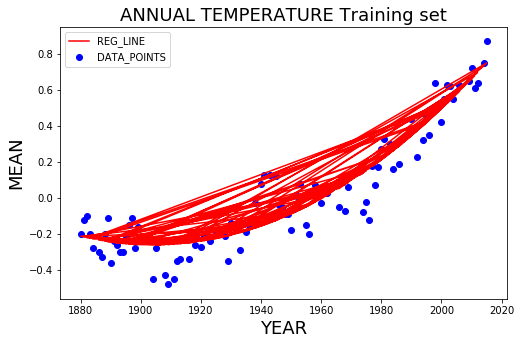

In [21]:
# Visualise the Polynomial Regression Results 
plt.figure(figsize=(8,5))
plt.scatter(x2_train, y2_train ,color = 'b',label="DATA_POINTS") 
  
plt.plot(x2_train, PolyReg_2.predict(polynom2.fit_transform(x2_train)), color = 'r',label="REG_LINE") 
plt.title('ANNUAL TEMPERATURE Training set',fontsize=18)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('MEAN',fontsize=18)
plt.legend()  
plt.show()

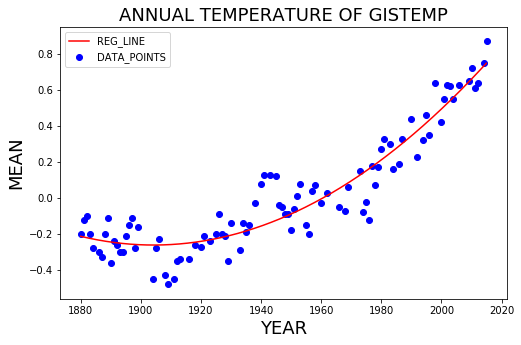

In [22]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.figure(figsize=(8,5))
X2_grid = np.arange(min(x2_train), max(x2_train), 0.1)
X2_grid = X2_grid.reshape((len(X2_grid), 1))
plt.scatter(x2_train, y2_train, color = 'b',label="DATA_POINTS")
plt.plot(X2_grid, PolyReg_2.predict(polynom2.fit_transform(X2_grid)), color = 'r',label="REG_LINE")
plt.title('ANNUAL TEMPERATURE OF GISTEMP',fontsize=18)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('MEAN',fontsize=18)
plt.legend()    
plt.show()

In [23]:
y2_pred=PolyReg_2.predict(polynom2.fit_transform(x2_test))

In [24]:
ind2_acc=r2_score(y2_test,y2_pred)
print(r2_score(y2_test,y2_pred))

0.824968369371956


# ACCURACY

In [25]:
ind1_acc=r2_score(y1_test,y1_pred)
print(r2_score(y1_test,y1_pred))

0.8221433641462763


In [26]:
ind2_acc=r2_score(y2_test,y2_pred)
print(r2_score(y2_test,y2_pred))

0.824968369371956


# MAKE  PREDICTION 

In [27]:
def pre_temp(year):
    temp1=PolyReg_1.predict(polynom1.fit_transform([[year]]))
    temp2=PolyReg_2.predict(polynom2.fit_transform([[year]]))
    dic={
        "source":["GCAG","GISTEMP"],
        "year":[year,year],
        "Mean_temp":[temp1, temp2]
    }
    res=pd.DataFrame(dic)
    return res

In [28]:
res_df=pre_temp(2017)
res_df

,source,year,Mean_temp
0,GCAG,2017,[0.7744863107142805]
1,GISTEMP,2017,[0.786545329372359]


In [29]:
res_df=pre_temp(2016)
res_df

,source,year,Mean_temp
0,GCAG,2016,[0.7569826920633886]
1,GISTEMP,2016,[0.768048508175923]


In [30]:
res_df=pre_temp(2020)
res_df

,source,year,Mean_temp
0,GCAG,2020,[0.8279214515362696]
1,GISTEMP,2020,[0.8430242495647349]


In [31]:
res_df=pre_temp(2030)
res_df

,source,year,Mean_temp
0,GCAG,2030,[1.0160516736896739]
1,GISTEMP,2030,[1.0419955967388432]
